# Siamska neuronova sit
18.6. Matyas Vondra

Rozhodnuti, zda je na dvou fotkach stejna osoba

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Workshop/')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content/drive/MyDrive/Colab Notebooks/Workshop


In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders
import pathlib

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, losses
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [6]:
the_labels = {
    0: "Angelina Jolie",
    1: "Brad Pitt",
    2: "Denzel Washington",
    3: "Hugh Jackman",
    4: "Jennifer Lawrence",
    5: "Johnny Depp",
    6: "Kate Winslet",
    7: "Leonardo DiCaprio",
    8: "Megan Fox",
    9: "Natalie Portman",
    10: "Nicole Kidman",
    11: "Robert Downey Jr",
    12: "Sandra Bullock",
    13: "Scarlett Johansson",
    14: "Tom Cruise",
    15: "Tom Hanks",
    16: "Will Smith"
}

In [7]:
# Za tohle se omlouvam, nenasel jsem lepsi zpusob jak nacist data ze slozek
# a roztridit je do np.array, tak aby s nima slo hezky pracovat
import glob
aj = glob.glob('Celebrity Faces Dataset/Angelina Jolie/*.*')
bp = glob.glob('Celebrity Faces Dataset/Brad Pitt/*.*')
dw = glob.glob('Celebrity Faces Dataset/Denzel Washington/*.*')
hj = glob.glob('Celebrity Faces Dataset/Hugh Jackman/*.*')
jl = glob.glob('Celebrity Faces Dataset/Jennifer Lawrence/*.*')
jd = glob.glob('Celebrity Faces Dataset/Johnny Depp/*.*')
kw = glob.glob('Celebrity Faces Dataset/Kate Winslet/*.*')
ld = glob.glob('Celebrity Faces Dataset/Leonardo DiCaprio/*.*')
mf = glob.glob('Celebrity Faces Dataset/Megan Fox/*.*')
npo = glob.glob('Celebrity Faces Dataset/Natalie Portman/*.*')
nk = glob.glob('Celebrity Faces Dataset/Nicole Kidman/*.*')
rd = glob.glob('Celebrity Faces Dataset/Robert Downey Jr/*.*')
sb = glob.glob('Celebrity Faces Dataset/Sandra Bullock/*.*')
sj = glob.glob('Celebrity Faces Dataset/Scarlett Johansson/*.*')
tc = glob.glob('Celebrity Faces Dataset/Tom Cruise/*.*')
th = glob.glob('Celebrity Faces Dataset/Tom Hanks/*.*')
ws = glob.glob('Celebrity Faces Dataset/Will Smith/*.*')

data = []
labels = []

for i in aj:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in bp:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in dw:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in hj:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in jl:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(4)
for i in jd:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(5)
for i in kw:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(6)
for i in ld:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(7)
for i in mf:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(8)
for i in npo:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(9)
for i in nk:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(10)
for i in rd:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(11)
for i in sb:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(12)
for i in sj:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(13)
for i in tc:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(14)
for i in th:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(15)
for i in ws:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(16)

data = np.array(data)
labels = np.array(labels)

In [8]:
print(type(data))
print(data.shape)
print(len(labels))

<class 'numpy.ndarray'>
(1800, 150, 150, 3)
1800


Angelina Jolie


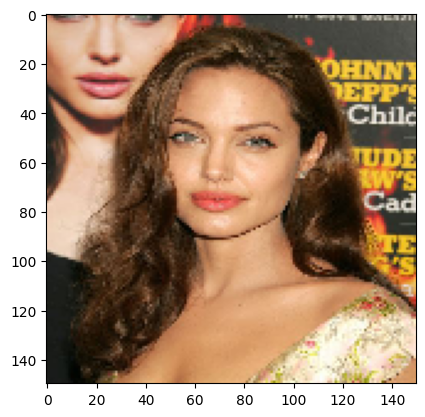

In [9]:
plt.imshow(data[0])
print(the_labels[labels[0]])

In [10]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.1,
                                                random_state=1)

In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
# vytvoreni párů obrázku - pro tretning !!!!
# pro kazdou fotku vytvorime dva pary:
# 1 s fotkou stejneho typu, 1 s rozdilneho
# a pridame promennou jestli jsou nebo nejsou stejneho typu
def create_pairs(images, digit_labels):
    digit_indices = [np.where(digit_labels == i)[0] for i in range(17)]
    pairs = []
    pair_labels = []

    for idx1 in range(len(images)):
        # Výběr stejného obrázku
        x1 = images[idx1]
        label1 = digit_labels[idx1]
        idx2 = np.random.choice(digit_indices[label1])
        x2 = images[idx2]

        pairs += [[x1, x2]]
        pair_labels += [1]

        # Výběr náhodného obrázku
        label2 = np.random.randint(0, 17)
        while label2 == label1:
            label2 = np.random.randint(0, 17)

        idx2 = np.random.choice(digit_indices[label2])
        x2 = images[idx2]

        pairs += [[x1, x2]]
        pair_labels += [0]

    return np.array(pairs), np.array(pair_labels)

In [13]:
# vytvoření trénovacích a testovacích párů - reálný dataset!!!
train_pairs, train_y = create_pairs(train_images, train_labels)
test_pairs, test_y = create_pairs(test_images, test_labels)

In [14]:
print(type(train_pairs))
print(train_pairs.shape)
print(len(train_y))

<class 'numpy.ndarray'>
(3240, 2, 150, 150, 3)
3240


# Vytvareni modelu

In [15]:
# Vytvořeni base-modelu
input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(64, (15, 15), activation='relu', padding='same')(input)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='sigmoid')(x)
base_network = Model(inputs=input, outputs=x)

In [16]:
# vetve siamske nn
input_a = layers.Input(shape=(150, 150, 3))
input_b = layers.Input(shape=(150, 150, 3))

processed_a = base_network(input_a)
processed_b = base_network(input_b)


In [17]:
# vypoctu rozdíl mezi vetvi A a vetvi B:

distance = layers.Lambda(
    lambda tensors: tf.abs(tensors[0] - tensors[1]))([processed_a, processed_b])
output = layers.Dense(1, activation='sigmoid')(distance)

In [18]:
# Tohle je az realny model - vlastne pomeruje výsledky dvou neuronových sítí!!

model = Model([input_a, input_b], output)

In [19]:
# kompilace a trening
model.compile(loss=losses.BinaryCrossentropy(), optimizer='adam',
              metrics=['accuracy'])
history = model.fit([train_pairs[:, 0], train_pairs[:, 1]],
                    train_y, batch_size=16, epochs=2,
                    validation_data=([test_pairs[:, 0], test_pairs[:, 1]],
                                     test_y))

Epoch 1/2
203/203 [==============================] - 1984s 10s/step - loss: 0.6944 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/2
203/203 [==============================] - 1947s 10s/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000


Bohuzel model predikuje vse kolem 0.5, tedy vsechny dvojice zatridi stejne
a ma tak accuracy 50%. Je mi lito, ale nepodarilo se mi najit problem a nauceni
modelu mi trva vzdy tak dlouho, ze musim ulohu odevzdat v takovemhle stavu.

12/12 [==============================] - 73s 6s/step


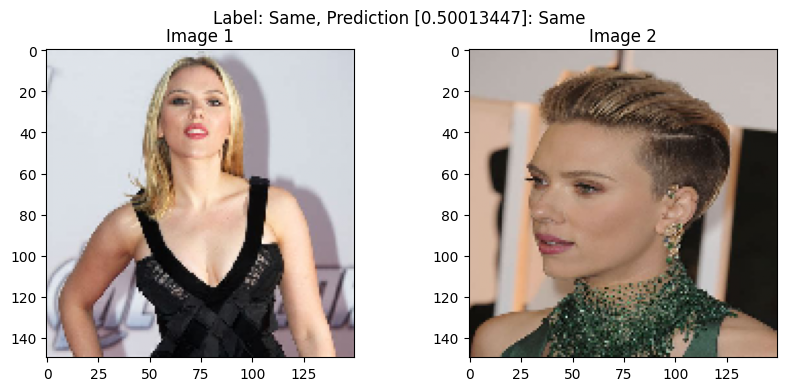

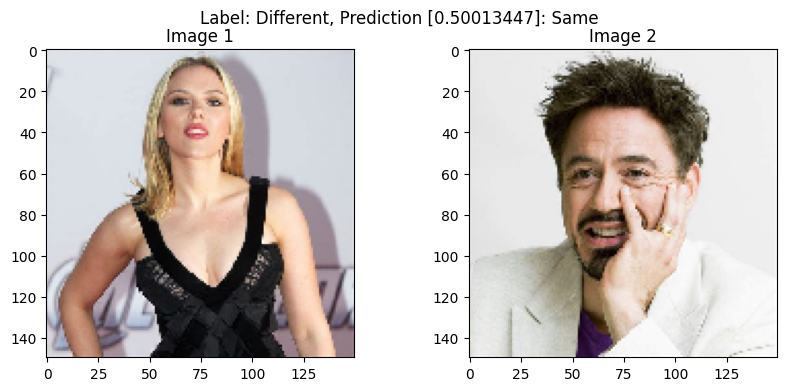

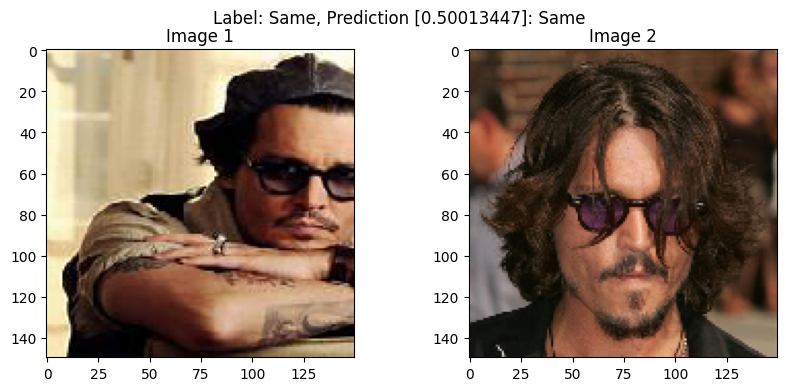

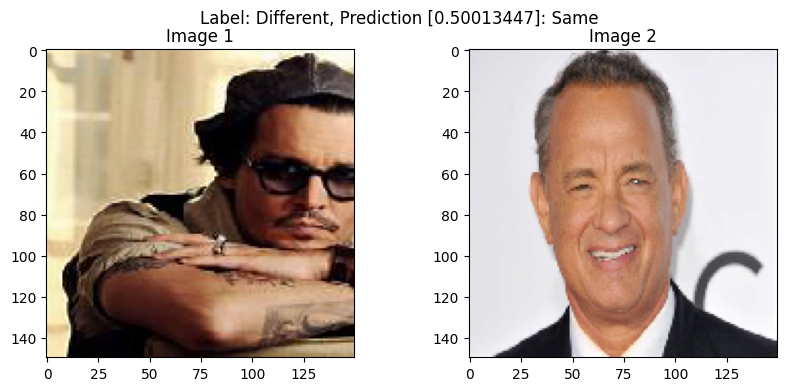

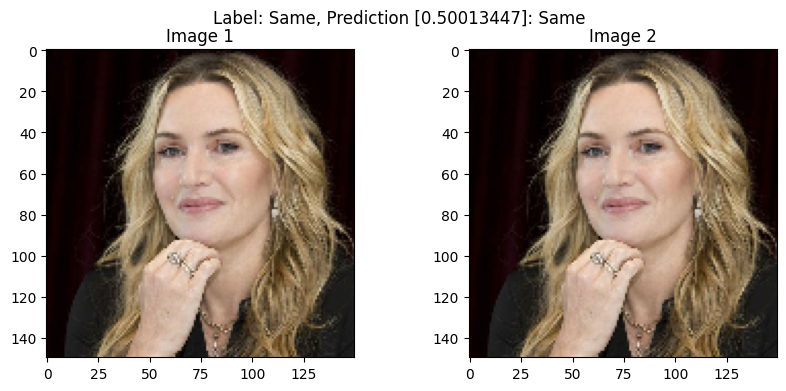

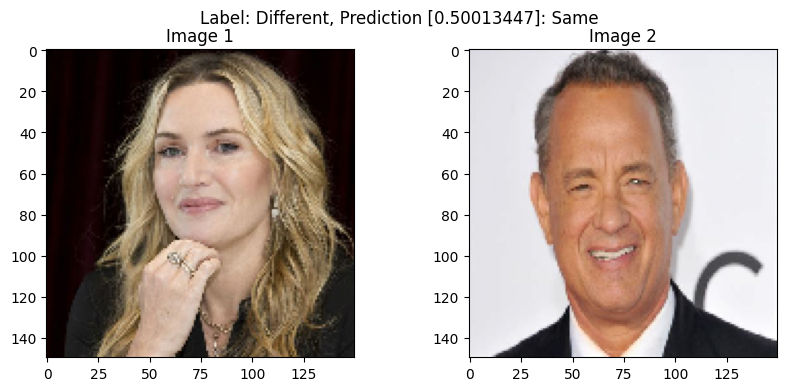

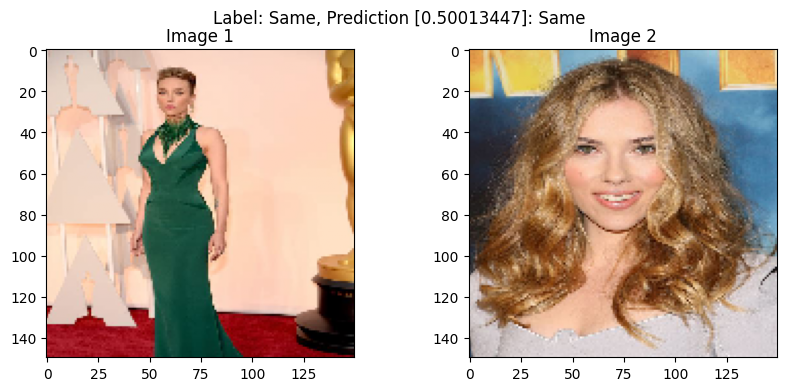

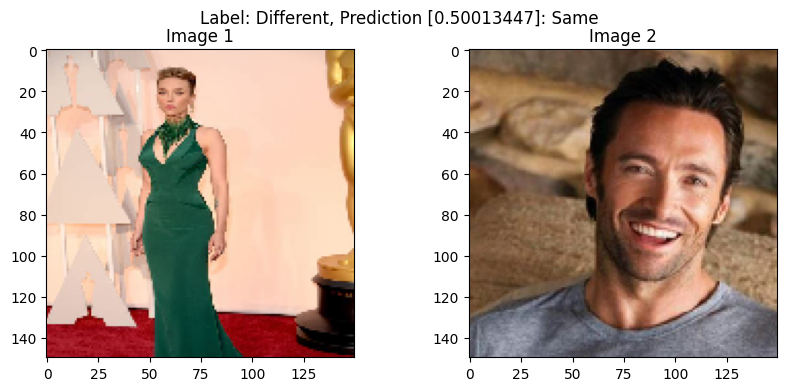

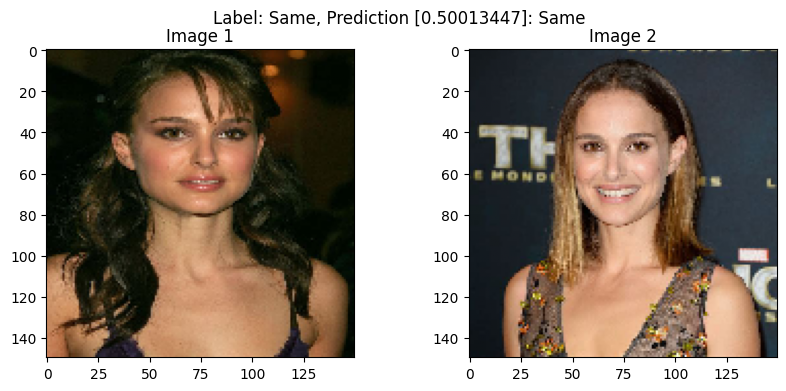

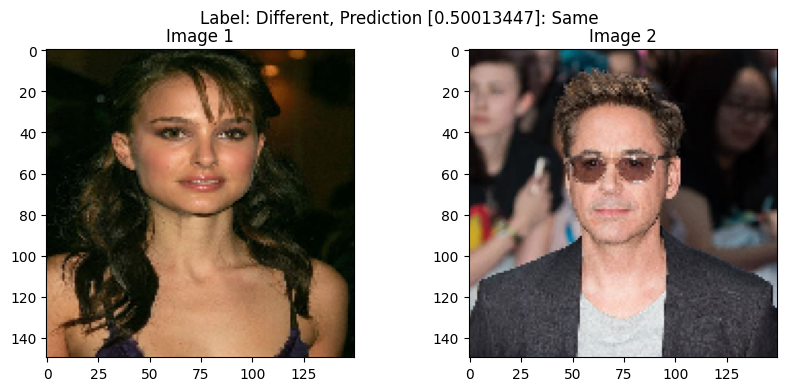

In [22]:
import matplotlib.pyplot as plt

def plot_images(image1, image2, label, pred):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.title('Image 1')

    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.title('Image 2')

    plt.suptitle(f"Label: {'Same' if label == 1 else 'Different'}, Prediction {pred}: {'Same' if pred >= 0.5 else 'Different'}")
    plt.show()

# Predikce na testovacích datech
predictions = model.predict([test_pairs[:, 0], test_pairs[:, 1]])

# Zobrazíme prvních 10 párů obrázků
for i in range(10):
    plot_images(test_pairs[i, 0], test_pairs[i, 1], test_y[i], predictions[i])


In [21]:
sum([i == j for i,j in zip(test_y, [i[0] for i in np.round(
    predictions)])])/len(test_y)

0.5